# CyberBullying Detection using NLP & Machine Learning

### 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import  TfidfVectorizer
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### 2. Import Dataset

In [2]:
imdf_cyber = pd.read_csv("ExportedDatasets/cyberbullying_dataset.csv")

### 3.  Check first 10 lines

In [3]:
imdf_cyber.head(10)

tweet_text  cyberbullying_type
0         In other words your food was crapilicious                    0
1                                   Why is so white                    0
2         a classy whore Or more red velvet cupcakes                   0
3  meh P  thanks for the heads up but not too con...                   0
4  This is an ISIS account pretending to be a Kur...                   0
5  Yes the test of god is that good or bad or ind...                   0
6  Itu sekolah ya bukan tempat bully Ga jauh kaya...                   0
7  Karma I hope it bites Kat on the butt She is j...                   0
8                    everything but mostly my priest                   0
9  Rebecca Black Drops Out of School Due to Bullying                   0

### 4. Check Datasets type values and sum & drop duplicates

In [4]:
imdf_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91801 entries, 0 to 91800
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          91801 non-null  object
 1   cyberbullying_type  91801 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [5]:
imdf_cyber['cyberbullying_type'].value_counts()

1    50178
0    41623
Name: cyberbullying_type, dtype: int64

In [6]:
imdf_cyber.tweet_text.duplicated().sum()

40901

In [7]:
imdf_cyber.duplicated().sum()

37337

In [8]:
imdf_cyber.duplicated(subset=['tweet_text']).sum()

40901

In [9]:
final_dataset = imdf_cyber.drop_duplicates()
final_dataset.to_csv('ExportedDatasets/cyberbullying_dataset_duplicates.csv')

In [10]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54464 entries, 0 to 79706
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          54464 non-null  object
 1   cyberbullying_type  54464 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [11]:
final_dataset['cyberbullying_type'].value_counts()

1    39990
0    14474
Name: cyberbullying_type, dtype: int64

### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

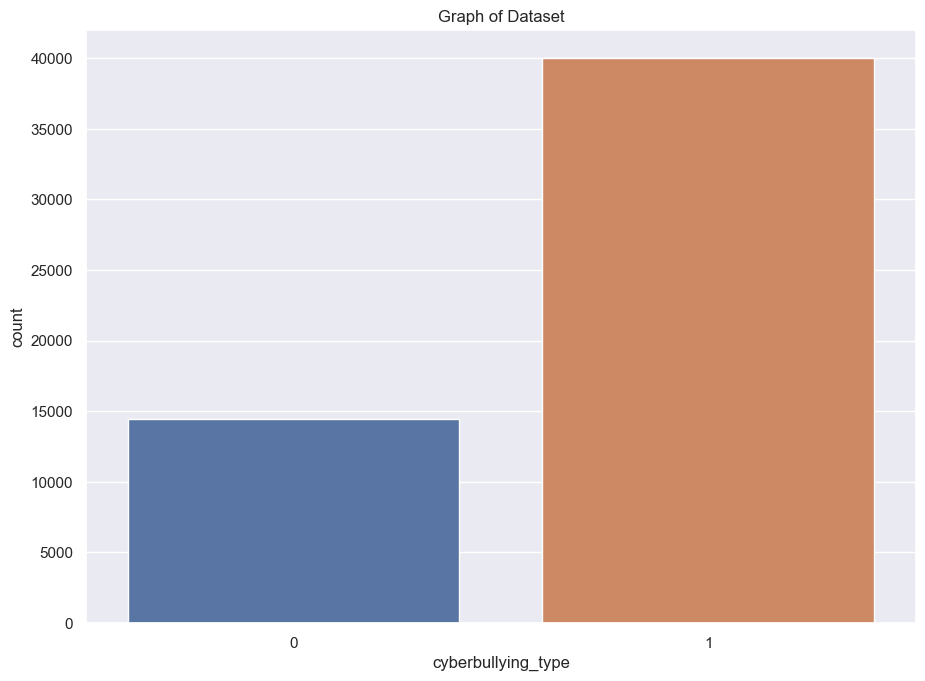

In [12]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type',data=final_dataset).set(title="Graph of Dataset")

### 5.1.1  Handle Imbalanced Dataset

In [13]:
cyberbullying = final_dataset[final_dataset.cyberbullying_type == 1]
print(cyberbullying)

                                              tweet_text  cyberbullying_type
7819   rape is realzvasiyana nema jokes about being d...                   1
7820   You never saw any celebrity say anything like ...                   1
7821   I mean hes gay but he uses gendered slurs and ...                   1
7822                                            feminazi                   1
7823   Rape is rape And the fact that I read one post...                   1
...                                                  ...                 ...
63871  I didnt think Id hate a couple more than these...                   1
63891  Nope call me sexist but gender roles are defin...                   1
63896   Some of you people will call me sexist and mi...                   1
63904        Im not sexist but I hate all female rappers                   1
79706   A Misogynist A woman wants her man to treat h...                   1

[39990 rows x 2 columns]


In [14]:
no_cyberbullying = final_dataset[final_dataset.cyberbullying_type == 0]
print(no_cyberbullying)

                                              tweet_text  cyberbullying_type
0             In other words your food was crapilicious                    0
1                                       Why is so white                    0
2             a classy whore Or more red velvet cupcakes                   0
3      meh P  thanks for the heads up but not too con...                   0
4      This is an ISIS account pretending to be a Kur...                   0
...                                                  ...                 ...
63915  Soz my kitchen rules Ive lost interest the ins...                   0
63916  Feeling so sorry for the girls they should be ...                   0
63917  pretty good dishes were happy with  OK well Im...                   0
63919              You are too stupid to talk to Blocked                   0
63920  And before you protest that youre not mad ther...                   0

[14474 rows x 2 columns]


In [15]:
cyberbullying_sample = cyberbullying.sample(n=15526)

In [16]:
print(cyberbullying_sample.shape)

(15526, 2)


In [17]:
final_dataset = pd.concat([cyberbullying_sample, no_cyberbullying], axis=0)

In [18]:
final_dataset.head()

tweet_text  cyberbullying_type
16841  Arey Idiot how does CAA affect An or any India...                   1
9946   You put up with a lot of crap as a Congression...                   1
39051  I foresee a lot of issues when the pod system ...                   1
33576  I quit dance when I was bullied out of it in e...                   1
44788  My friends and me got called niggers by this M...                   1

In [19]:
final_dataset.shape

(30000, 2)

In [20]:
final_dataset.info

<bound method DataFrame.info of                                               tweet_text  cyberbullying_type
16841  Arey Idiot how does CAA affect An or any India...                   1
9946   You put up with a lot of crap as a Congression...                   1
39051  I foresee a lot of issues when the pod system ...                   1
33576  I quit dance when I was bullied out of it in e...                   1
44788  My friends and me got called niggers by this M...                   1
...                                                  ...                 ...
63915  Soz my kitchen rules Ive lost interest the ins...                   0
63916  Feeling so sorry for the girls they should be ...                   0
63917  pretty good dishes were happy with  OK well Im...                   0
63919              You are too stupid to talk to Blocked                   0
63920  And before you protest that youre not mad ther...                   0

[30000 rows x 2 columns]>

### 6.  WordCloud of Dataset

In [21]:
text = ''.join(final_dataset["tweet_text"].tolist())

In [22]:
''.join(final_dataset["tweet_text"].tolist())

'Arey Idiot how does CAA affect An or any Indian Muslim  If still your family is getting fathered by TurksPathans or Afghans then only it may affect you partially In such a scenario apply for Indian Citizenship and stay here for yrs to get eligible for citizenryYou put up with a lot of crap as a Congressional staffer but I cant stop thinking about being a female staffer for a member who thinks its okay to call another member or anyone a fucking bitchI foresee a lot of issues when the pod system comes into schools The plan that is there doesnt seem to be bully proof and Im not sure its a consideration It will definitely be in the minds of some kids amp families especially those who were relieved when lockdown happenedI quit dance when I was bullied out of it in elementary school We were doing a song from High School Musical in my dance class one day and this girl found out and told the whole class to sing were all in this together when I walked in the next day Fuck that girlMy friends a

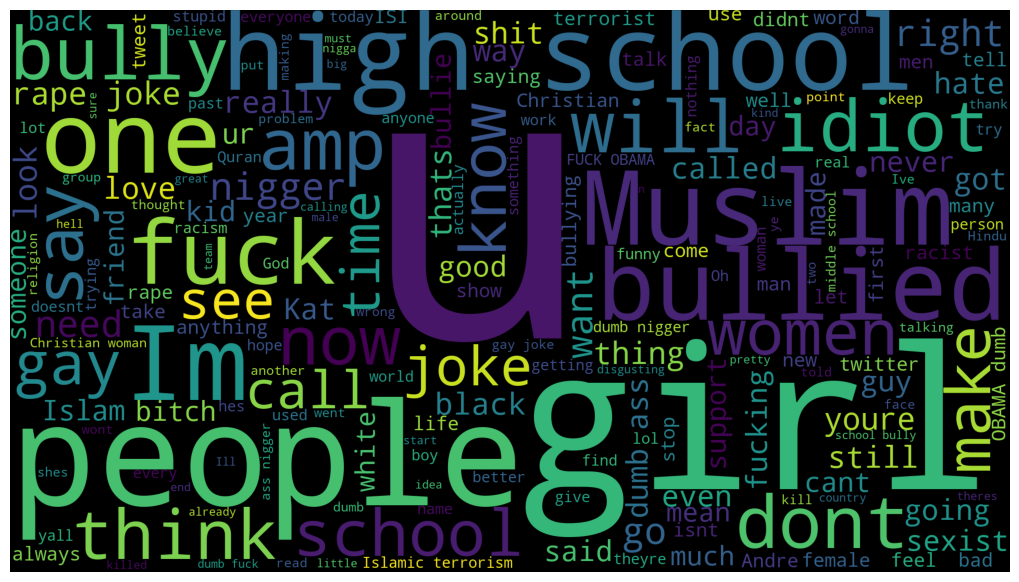

In [23]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 7. Stopwords

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 8. Data pre-processing

In [26]:
final_dataset.shape

(30000, 2)

In [27]:
final_dataset.head()

tweet_text  cyberbullying_type
16841  Arey Idiot how does CAA affect An or any India...                   1
9946   You put up with a lot of crap as a Congression...                   1
39051  I foresee a lot of issues when the pod system ...                   1
33576  I quit dance when I was bullied out of it in e...                   1
44788  My friends and me got called niggers by this M...                   1

In [28]:
final_dataset.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [29]:
#separating tweet_text & cyberbullying_type
X = final_dataset.drop(columns='cyberbullying_type', axis=1)
Y = final_dataset['cyberbullying_type']
X.to_csv('ExportedDatasets/cyberbullying_X.csv')
Y.to_csv('ExportedDatasets/cyberbullying_Y.csv')

In [30]:
print(X)
print(Y)

                                              tweet_text
16841  Arey Idiot how does CAA affect An or any India...
9946   You put up with a lot of crap as a Congression...
39051  I foresee a lot of issues when the pod system ...
33576  I quit dance when I was bullied out of it in e...
44788  My friends and me got called niggers by this M...
...                                                  ...
63915  Soz my kitchen rules Ive lost interest the ins...
63916  Feeling so sorry for the girls they should be ...
63917  pretty good dishes were happy with  OK well Im...
63919              You are too stupid to talk to Blocked
63920  And before you protest that youre not mad ther...

[30000 rows x 1 columns]
16841    1
9946     1
39051    1
33576    1
44788    1
        ..
63915    0
63916    0
63917    0
63919    0
63920    0
Name: cyberbullying_type, Length: 30000, dtype: int64


### 9. Stemming: Process of reducing a word to its root word

In [31]:
port_stem = PorterStemmer()

In [32]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [33]:
final_dataset['tweet_text'] = final_dataset['tweet_text'].apply(stemming)

In [34]:
print(final_dataset['tweet_text'])

16841    arey idiot caa affect indian muslim still fami...
9946     put lot crap congression staffer cant stop thi...
39051    forese lot issu pod system come school plan do...
33576    quit danc bulli elementari school song high sc...
44788    friend got call nigger mexican chick she color...
                               ...                        
63915    soz kitchen rule ive lost interest instant res...
63916                feel sorri girl safe kat andr go home
63917    pretti good dish happi ok well im never eat place
63919                                    stupid talk block
63920    protest your mad there much reason youd tweet ...
Name: tweet_text, Length: 30000, dtype: object


In [35]:
text = ''.join(final_dataset["tweet_text"].tolist())
''.join(final_dataset["tweet_text"].tolist())

'arey idiot caa affect indian muslim still famili get father turkspathan afghan may affect partial scenario appli indian citizenship stay yr get elig citizenriput lot crap congression staffer cant stop think femal staffer member think okay call anoth member anyon fuck bitchforese lot issu pod system come school plan doesnt seem bulli proof im sure consider definit mind kid amp famili especi reliev lockdown happenquit danc bulli elementari school song high school music danc class one day girl found told whole class sing togeth walk next day fuck girlfriend got call nigger mexican chick she color though racism finesttell harley davidson worker lost job bc bullish approach chines import agre tough w china way hurt us almost think smarter strateg bulli grade school approach doesnt workomg girl liter bulli throughout high schoolfit she comeidiot listbulli high school medic condit wors yet girl cathol hs sign petit whenev get bulli school life short school kid age pickseabreez high school ju

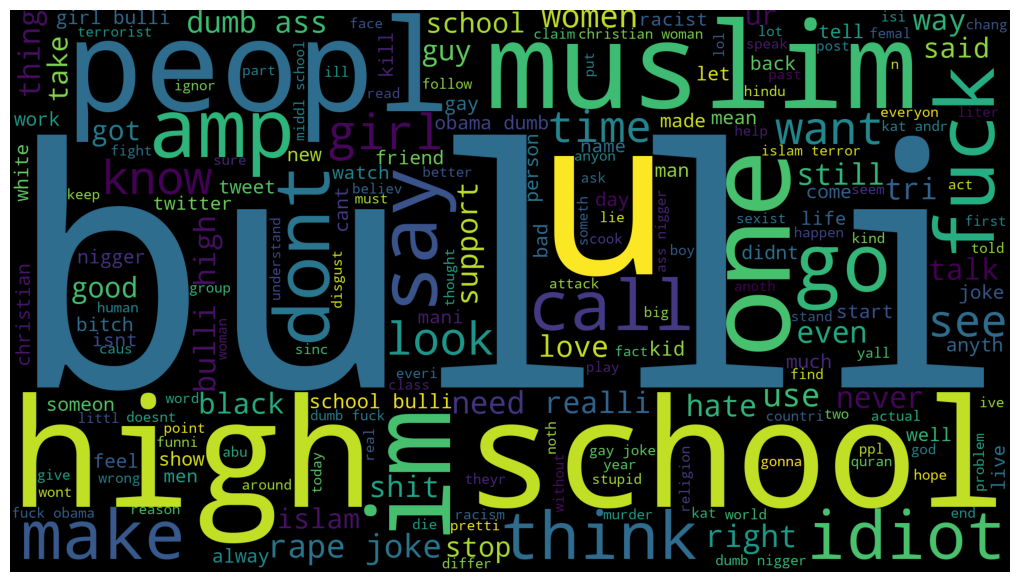

In [36]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [37]:
#separating tweet_text & cyberbullying_type
X = final_dataset['tweet_text']
Y = final_dataset['cyberbullying_type']

In [38]:
print(X)

16841    arey idiot caa affect indian muslim still fami...
9946     put lot crap congression staffer cant stop thi...
39051    forese lot issu pod system come school plan do...
33576    quit danc bulli elementari school song high sc...
44788    friend got call nigger mexican chick she color...
                               ...                        
63915    soz kitchen rule ive lost interest instant res...
63916                feel sorri girl safe kat andr go home
63917    pretti good dish happi ok well im never eat place
63919                                    stupid talk block
63920    protest your mad there much reason youd tweet ...
Name: tweet_text, Length: 30000, dtype: object


In [39]:
X.shape

(30000,)

In [40]:
print(Y)

16841    1
9946     1
39051    1
33576    1
44788    1
        ..
63915    0
63916    0
63917    0
63919    0
63920    0
Name: cyberbullying_type, Length: 30000, dtype: int64


In [41]:
Y.shape

(30000,)

### 11. Train/Test Splitting

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [43]:
X_train.shape

(21000,)

In [44]:
X_test.shape

(9000,)

In [45]:
Y_train.shape

(21000,)

In [46]:
Y_test.shape

(9000,)

### 10. Feature Extraction (Converting the textual data to numerical data)

In [47]:
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_transform = vectorizer.fit_transform(X_train)
X_test_transform = vectorizer.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [48]:
print(X_train_transform)

  (0, 6786)	0.2733636594104222
  (0, 10244)	0.4800822856783119
  (0, 17020)	0.45841345582916854
  (0, 4668)	0.434097179616809
  (0, 3336)	0.36981203878507607
  (0, 16015)	0.39931078976750245
  (1, 14365)	0.18918362551534376
  (1, 4445)	0.2819318657850999
  (1, 7134)	0.2153861703240786
  (1, 16383)	0.26723723469086497
  (1, 1583)	0.4385320515403283
  (1, 18206)	0.25513490680579837
  (1, 11465)	0.23664781339624177
  (1, 15373)	0.2910611631764828
  (1, 10455)	0.21152267294572935
  (1, 18831)	0.21110256794908933
  (1, 3005)	0.20002460670545327
  (1, 15478)	0.42120030790389124
  (1, 15494)	0.24913528392232417
  (2, 6344)	0.13804871586453665
  (2, 15515)	0.31284846265365807
  (2, 1673)	0.2190542615914044
  (2, 9260)	0.173504645726823
  (2, 9957)	0.19459191152627706
  (2, 17007)	0.33098816154886734
  :	:
  (20996, 1300)	0.534103852675842
  (20996, 8209)	0.46355842254538365
  (20996, 9747)	0.3515722016110928
  (20996, 8821)	0.23329190062626928
  (20997, 6397)	0.49286124050268043
  (20997, 5262

In [49]:
print(X_test_transform)

  (1, 18668)	0.3867218158663152
  (1, 18428)	0.18456084983803056
  (1, 17641)	0.26969668353786913
  (1, 15445)	0.29774959607128504
  (1, 14889)	0.13280913198900082
  (1, 12646)	0.1536944696686722
  (1, 10883)	0.3285791204139157
  (1, 10561)	0.2720857416124174
  (1, 9899)	0.18480385713510242
  (1, 9260)	0.1766385449887028
  (1, 7691)	0.27902344520314815
  (1, 7574)	0.15546830604147027
  (1, 6743)	0.3305235238973968
  (1, 6712)	0.1516882740138963
  (1, 5995)	0.30573515804560397
  (1, 4768)	0.15430678608476392
  (1, 2339)	0.12173512351410297
  (2, 18425)	0.2204717480003653
  (2, 14365)	0.15607721977314756
  (2, 10211)	0.3579115076197718
  (2, 10183)	0.6495974970972065
  (2, 9796)	0.22177801102451947
  (2, 9377)	0.2468936305166767
  (2, 8058)	0.2542629598302239
  (2, 5864)	0.17995766976713487
  :	:
  (8997, 3726)	0.22845565044764407
  (8997, 3005)	0.15912646470353062
  (8997, 2780)	0.2478572507897317
  (8997, 2415)	0.23555443927718092
  (8997, 1789)	0.2803497899890228
  (8998, 18069)	0.484

### 12. Training the Model: Logistic Regression (LR)

In [50]:
modelLR = LogisticRegression()

In [51]:
modelLR.fit(X_train_transform, Y_train)

LogisticRegression()

#### Evaluation: Accuracy Score

In [52]:
X_train_prediction = modelLR.predict(X_train_transform)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [53]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8622857142857143


In [54]:
X_test_prediction = modelLR.predict(X_test_transform)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [55]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8221111111111111


In [56]:
print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.87      0.79      0.82      4778
           1       0.78      0.86      0.82      4222

    accuracy                           0.82      9000
   macro avg       0.82      0.82      0.82      9000
weighted avg       0.83      0.82      0.82      9000



### 13. Training the Model: Support Vector Machine(SVM)

In [57]:
from sklearn.svm import LinearSVC

svm = LinearSVC(C=0.0001)
svm.fit(X_train_transform, Y_train)

LinearSVC(C=0.0001)

In [58]:
svm_predict = svm.predict(X_train_transform)
svm_training_data_accuracy = accuracy_score(Y_train,svm_predict)

print('Accuracy score of the training data : ', svm_training_data_accuracy)

Accuracy score of the training data :  0.5206190476190476


In [59]:
svm_predict_test = svm.predict(X_test_transform)
svm_test_data_accuracy = accuracy_score(Y_test,svm_predict_test)

print('Accuracy score of the test data : ', svm_test_data_accuracy)

Accuracy score of the test data :  0.5188888888888888


In [60]:
print(classification_report(svm_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.00      0.91      0.01        23
           1       1.00      0.52      0.68      8977

    accuracy                           0.52      9000
   macro avg       0.50      0.72      0.35      9000
weighted avg       1.00      0.52      0.68      9000



### 14. Training the Model: Naive Bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_transform, Y_train)

MultinomialNB()

In [62]:
from sklearn.metrics import accuracy_score
nb_predict = mnb.predict(X_train_transform)
nb_training_data_accuracy = accuracy_score(Y_train,nb_predict)

print('Accuracy score of the training data : ', nb_training_data_accuracy)

Accuracy score of the training data :  0.8287142857142857


In [63]:
nb_predict_test = mnb.predict(X_test_transform)
nb_test_data_accuracy = accuracy_score(Y_test,nb_predict_test)

print('Accuracy score of the test data : ', nb_test_data_accuracy)

Accuracy score of the test data :  0.7356666666666667


In [64]:
print(classification_report(nb_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.60      0.80      0.69      3246
           1       0.86      0.70      0.77      5754

    accuracy                           0.74      9000
   macro avg       0.73      0.75      0.73      9000
weighted avg       0.77      0.74      0.74      9000



### 15. Training the Model: Decision Tree


In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_transform,Y_train)

DecisionTreeClassifier()

In [66]:
dt_predict = dt.predict(X_train_transform)
dt_training_data_accuracy= accuracy_score(Y_train, dt_predict)

print('Accuracy score of the training data : ', dt_training_data_accuracy)

Accuracy score of the training data :  0.9638095238095238


In [67]:
dt_predict_test = dt.predict(X_test_transform)
dt_test_data_accuracy=accuracy_score(Y_test, dt_predict_test)

print('Accuracy score of the test data : ', dt_test_data_accuracy)

Accuracy score of the test data :  0.779


In [68]:
print(classification_report(dt_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      4514
           1       0.77      0.80      0.78      4486

    accuracy                           0.78      9000
   macro avg       0.78      0.78      0.78      9000
weighted avg       0.78      0.78      0.78      9000



### 16. Training the Model: Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train_transform, Y_train)

RandomForestClassifier(n_estimators=30)

In [70]:
rf_predict = rf.predict(X_train_transform)
rf_training_data_accuracy=accuracy_score(Y_train, rf_predict)

print('Accuracy score of the training data : ', rf_training_data_accuracy)

Accuracy score of the training data :  0.963


In [71]:
rf_predict_test = rf.predict(X_test_transform)
rf_test_data_accuracy=accuracy_score(Y_test, rf_predict_test)
print('Accuracy score of the test data : ', rf_test_data_accuracy)

Accuracy score of the test data :  0.806


In [72]:
print(classification_report(rf_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      4777
           1       0.77      0.84      0.80      4223

    accuracy                           0.81      9000
   macro avg       0.81      0.81      0.81      9000
weighted avg       0.81      0.81      0.81      9000



### 17. Training the Model: XGBoost

In [73]:
import xgboost as xgb

modelXGB = xgb.XGBClassifier()
modelXGB.fit(X_train_transform,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [74]:
xgb_prediction = modelXGB.predict(X_train_transform)
xgb_training_data_accuracy=accuracy_score(Y_train, xgb_prediction)

print('Accuracy score of the training data : ', xgb_training_data_accuracy)

Accuracy score of the training data :  0.8664285714285714


In [75]:
xgb_prediction_test = modelXGB.predict(X_test_transform)
xgb_test_data_accuracy=accuracy_score(Y_test, xgb_prediction_test)

print('Accuracy score of the test data : ', xgb_test_data_accuracy)

Accuracy score of the test data :  0.8388888888888889


In [76]:
print(classification_report(xgb_prediction_test,Y_test))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      5245
           1       0.75      0.93      0.83      3755

    accuracy                           0.84      9000
   macro avg       0.84      0.85      0.84      9000
weighted avg       0.86      0.84      0.84      9000



### 18.Summary

In [77]:
from sklearn.ensemble import VotingClassifier
# 1) naive bayes = mnb
# 2) logistic regression =modelLR
# 3) random forest =rf
# 4) support vector machine = svm
# 5) Decision Tree = dt
# 6) XGBoost = modelXGB
evc=VotingClassifier(estimators=[('mnb',mnb),('modelLR',modelLR),('rf',rf),('svm',svm),('dt',dt),('modelXGB',modelXGB)],voting='hard')
evc.fit(X_train_transform, Y_train)
evc_prediction = evc.predict(X_train_transform)
evc_prediction_test = evc.predict(X_test_transform)
evc_accuracy = accuracy_score(Y_train, evc_prediction)
evc_accuracy_test = accuracy_score(Y_test, evc_prediction_test)
print("score on test: " , evc_accuracy_test)
print("score on train: ", evc_accuracy)

score on test:  0.8234444444444444
score on train:  0.931
